In [1]:
import warnings
warnings.filterwarnings("ignore")

## Data Exploration

In [2]:
# Load the dataset

import pandas as pd
df = pd.read_csv('loan_data.csv')

In [3]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [4]:
# Check dataset info to understand its structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
# Convert 'person_age' to int64

df.person_age = df.person_age.astype(dtype = 'int64')

In [6]:
# Calculate the number of duplicate rows in the DataFrame

df.duplicated().sum().item()

0

In [7]:
# Generate descriptive statistics for the DataFrame

df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## Data Preprocessing

In [8]:
# Identify categorical and numerical columns

categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

In [9]:
# Preprocessing pipeline for numerical and categorical features

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# For numerical features: apply scaling
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale the numerical data
])

# For categorical features: apply one-hot encoding
categorical_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical variables
])

# Combine both preprocessing steps into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ])

In [10]:
# Define feature columns and target column

X = df.drop(columns=['loan_status'])  # All columns except the target
y = df['loan_status']  # Target column

## Exploratory Data Analysis (EDA)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

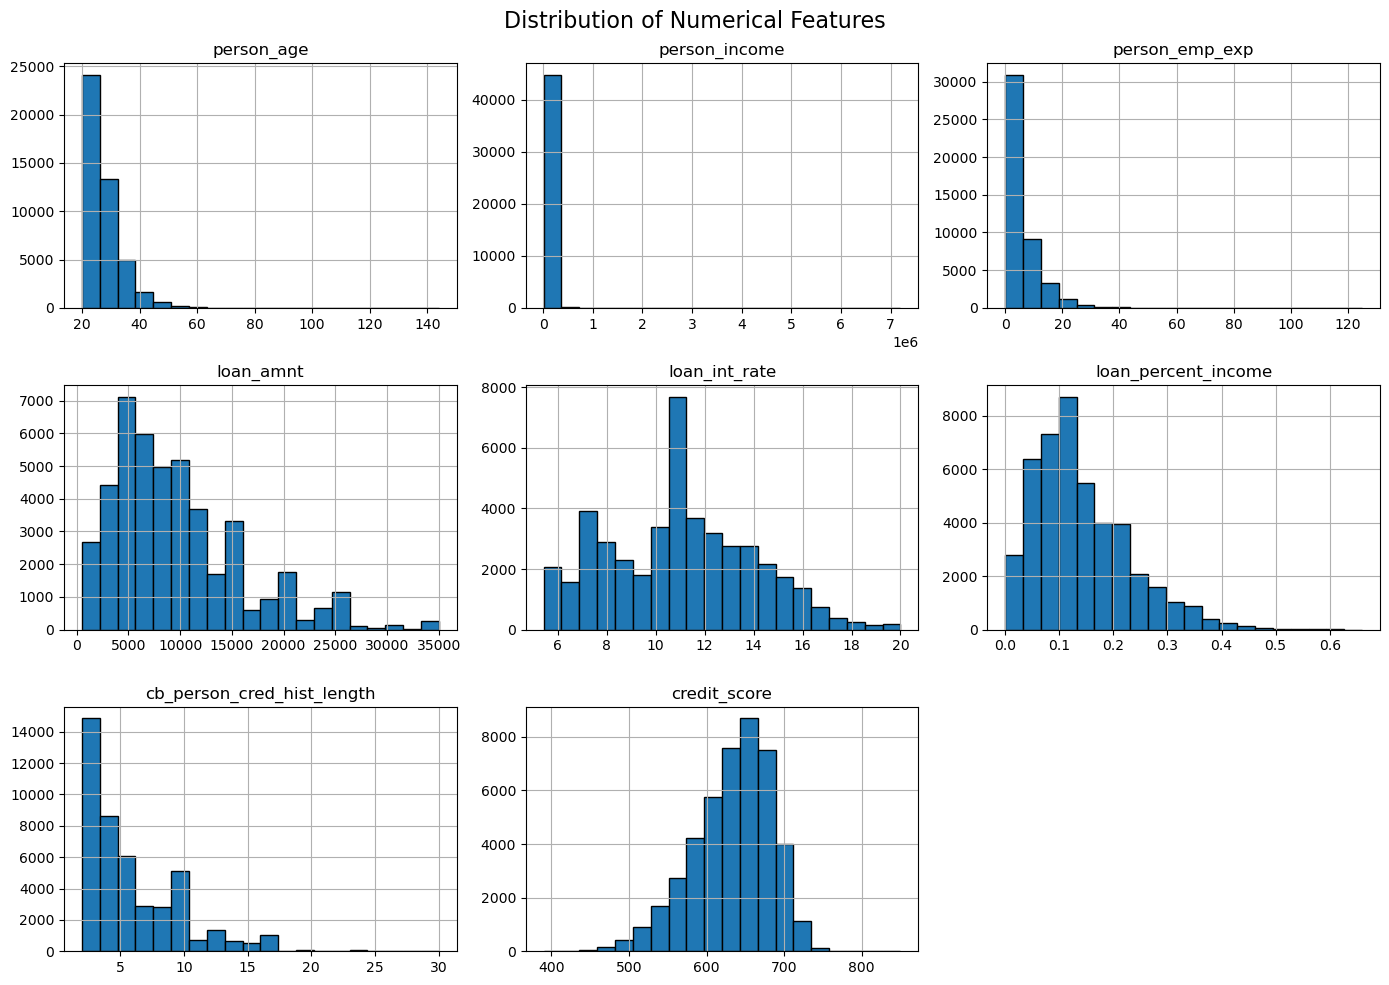

In [12]:
# Plot histograms for numerical features

X[numerical_columns].hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

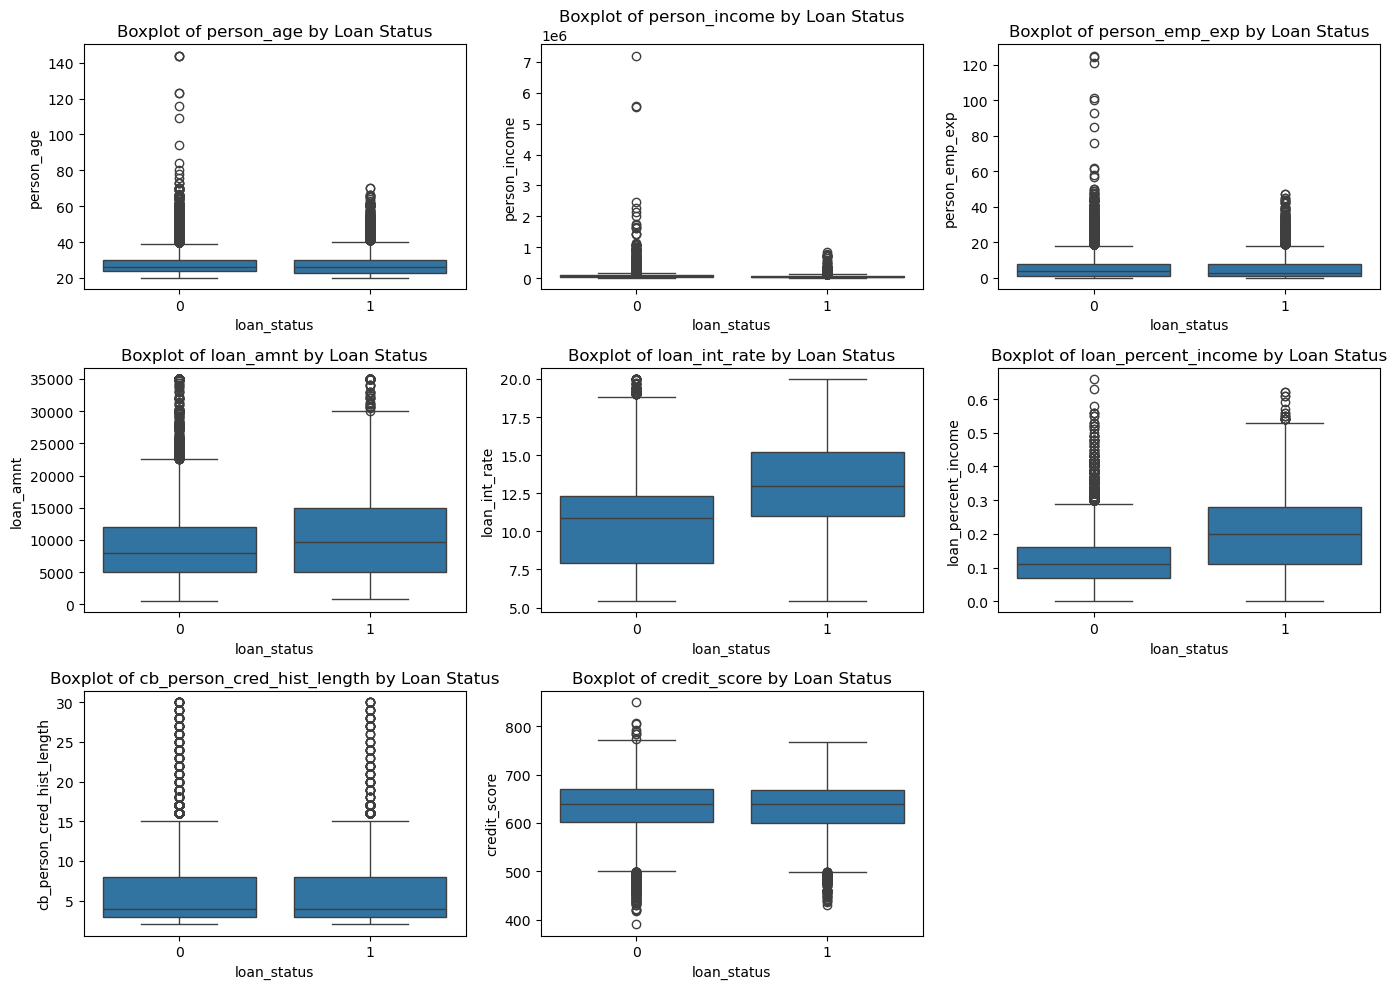

In [13]:
# Visualize the distribution of numerical features using box plots (for detecting outliers)

plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df['loan_status'], y=df[col])
    plt.title(f'Boxplot of {col} by Loan Status')
plt.tight_layout()
plt.show()

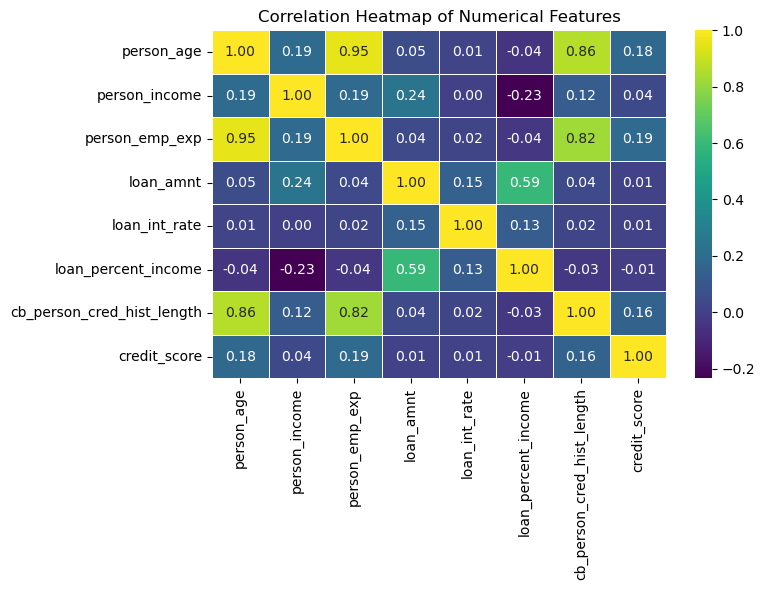

In [14]:
# Correlation heatmap of numerical features

# Calculate correlation matrix
corr_matrix = X[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

# Set title
plt.title('Correlation Heatmap of Numerical Features')

# Show the plot
plt.tight_layout()
plt.show()

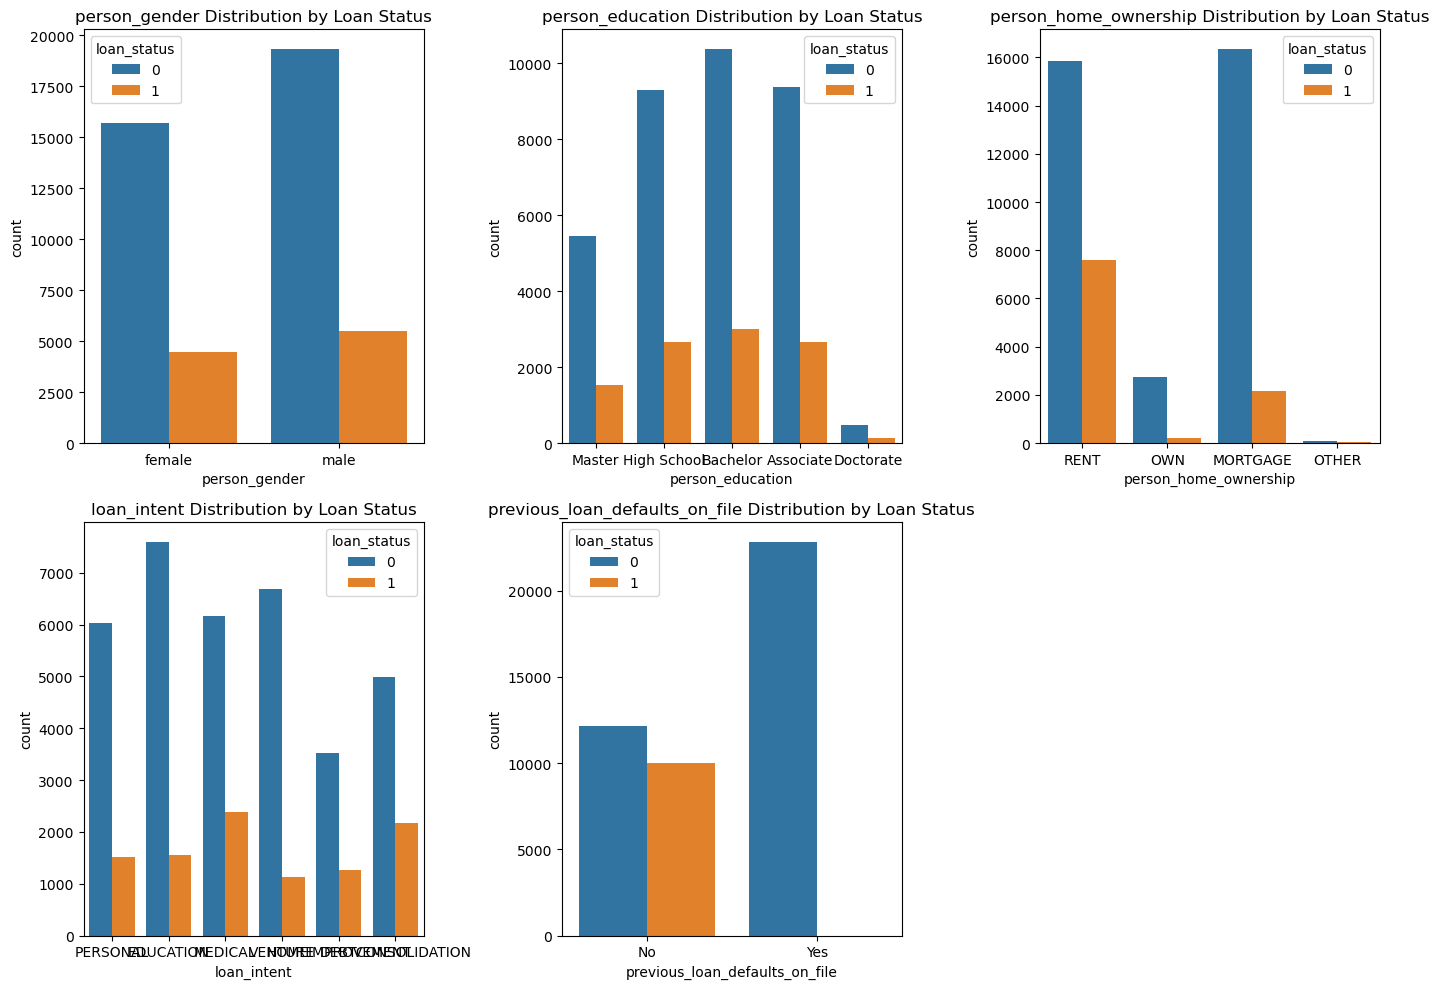

In [15]:
# Plot the distribution of each categorical variable

plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[col], hue=df['loan_status'])
    plt.title(f'{col} Distribution by Loan Status')
plt.tight_layout()
plt.show()

In [16]:
# Check correlations between numerical features and target variable (loan_status)
# Create a new DataFrame combining features and target variable to check correlations with loan_status

# One-hot encode categorical columns
df_encoded = pd.get_dummies(X, drop_first=True)

# Create a new DataFrame combining the encoded features and target variable
df_corr = pd.concat([df_encoded, y], axis=1)

# Compute the correlation of each feature with loan_status
corr_with_target = df_corr.corr()['loan_status'].sort_values(ascending=False)

# Print correlation with target
print("Correlation of numerical features with loan_status:\n", corr_with_target)

Correlation of numerical features with loan_status:
 loan_status                           1.000000
loan_percent_income                   0.384880
loan_int_rate                         0.332005
person_home_ownership_RENT            0.255239
loan_amnt                             0.107714
loan_intent_MEDICAL                   0.065195
loan_intent_HOMEIMPROVEMENT           0.033838
person_home_ownership_OTHER           0.013645
person_education_Bachelor             0.004728
person_education_Doctorate            0.001833
person_education_High School          0.001277
person_gender_male                   -0.000561
person_education_Master              -0.004741
credit_score                         -0.007647
cb_person_cred_hist_length           -0.014851
person_emp_exp                       -0.020481
person_age                           -0.021476
loan_intent_PERSONAL                 -0.022488
loan_intent_EDUCATION                -0.064006
loan_intent_VENTURE                  -0.085992
person_

## Split the dataset

In [17]:
# Split the dataset into training and testing sets (80% train, 20% test)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

## Model Evaluation

In [19]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9291111111111111
Confusion Matrix:
 [[6805  185]
 [ 453 1557]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



## Model Tuning

In [20]:
# Hyperparameter tuning using GridSearchCV (for Random Forest)
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, 30]
}

# Perform grid search for hyperparameter tuning
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearch
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)

# Evaluate the best model found by GridSearch
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf_best = best_model_rf.predict(X_test)

print("Best Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Best Random Forest Model Classification Report:\n", classification_report(y_test, y_pred_rf_best))

Best Hyperparameters for Random Forest: {'classifier__max_depth': 30, 'classifier__n_estimators': 200}
Best Random Forest Model Accuracy: 0.9285555555555556
Best Random Forest Model Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000

